# Создаём точку входа в Spark

In [2]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 198 kB 56.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=ca8701c62b106cfffc48d4ae21578d325703415d328c2a9c2c35d94076a5d3bc
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [3]:
# Создаём спарк контекст
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master('local[4]')\
        .appName('Lesson_2')\
        .config('spark.ui.port', '4050')\
        .config('spark.executor.instances', 2)\
        .config('spark.executor.memory', '5g')\
        .config('spark.executor.cores', 2)\
        .getOrCreate()

sc = spark.sparkContext

In [4]:
spark

# Самостоятельная работа

Требуется выяснить:
1. Какое соотношение сторон экрана телефона самое популярное,
2. Плотность пикселей у экрана.

Можно использовать только rdd.


## Считывание данных
Данные взяты отсюда: https://www.kaggle.com/iabhishekofficial/mobile-price-classification
Скачиваем и копируем в папку с нотебуком

Внутри содержится следующая информация:

* id: ID
* battery_power: Total energy a battery can store in one time (mAh)
* blue: Support bluetooth or not
* clock_speed: Speed at which microprocessor executes instructions
* dual_sim: Support dual sim or not
* fc: Front Camera mega pixels
* four_g: Support 4G or not
* int_memory: Internal Memory (GB)
* m_dep: Mobile Depth (cm)
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory (MB)
* sc_h: Screen Height of mobile (cm)
* sc_w: Screen Width of mobile (cm)
* talk_time: Time that a single battery charge will last
* three_g: Support 3G or not
* touch_screen: Has touch screen or not
* wifi: Support wifi or not

In [26]:
# Считываем данные
train = sc.textFile('/content/train.csv')
test = sc.textFile('/content/test.csv')

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
# Вспомогательная функция
def better_print(rdd, num, title):
    print(title)
    for row in rdd.take(num):
        print('\t', row)

In [38]:
# Выведите содержимое каждого файла (часть строк)

train.take(6)


['battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range',
 '842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1',
 '1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2',
 '563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2',
 '615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2',
 '1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1']

In [34]:
train.take(10)

['battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range',
 '842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1',
 '1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2',
 '563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2',
 '615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2',
 '1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1',
 '1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1',
 '1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3',
 '1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0',
 '1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0']

In [35]:
test.take(5)

['id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi',
 '1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0',
 '2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0',
 '3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1',
 '4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0']

In [36]:
test.take(10)

['id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi',
 '1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0',
 '2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0',
 '3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1',
 '4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0',
 '5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1',
 '6,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1',
 '7,1718,0,2.4,0,1,0,47,1,156,2,3,1283,1374,3873,14,2,10,0,0,0',
 '8,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1',
 '9,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0']

##  Преобразуем train и test

Все функции расписаны тут: [lhttps://spark.apache.org/docs/latest/rdd-programming-guide.html](https://spark.apache.org/docs/latest/rdd-programming-guide.html). Так же хорошая статья [тут](https://sparkbyexamples.com/pyspark-rdd)

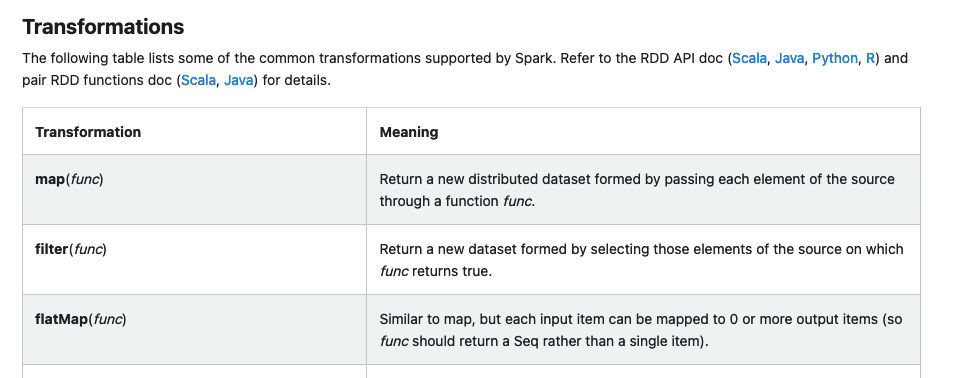

In [39]:
train_first_row = train.first()

train = train\
    .filter(lambda row: row != train_first_row)\
    .map(lambda row: [float(el) for el in row.split(',')])

In [42]:
better_print(train, 10, 'Train')

Train
	 [842.0, 0.0, 2.2, 0.0, 1.0, 0.0, 7.0, 0.6, 188.0, 2.0, 2.0, 20.0, 756.0, 2549.0, 9.0, 7.0, 19.0, 0.0, 0.0, 1.0, 1.0]
	 [1021.0, 1.0, 0.5, 1.0, 0.0, 1.0, 53.0, 0.7, 136.0, 3.0, 6.0, 905.0, 1988.0, 2631.0, 17.0, 3.0, 7.0, 1.0, 1.0, 0.0, 2.0]
	 [563.0, 1.0, 0.5, 1.0, 2.0, 1.0, 41.0, 0.9, 145.0, 5.0, 6.0, 1263.0, 1716.0, 2603.0, 11.0, 2.0, 9.0, 1.0, 1.0, 0.0, 2.0]
	 [615.0, 1.0, 2.5, 0.0, 0.0, 0.0, 10.0, 0.8, 131.0, 6.0, 9.0, 1216.0, 1786.0, 2769.0, 16.0, 8.0, 11.0, 1.0, 0.0, 0.0, 2.0]
	 [1821.0, 1.0, 1.2, 0.0, 13.0, 1.0, 44.0, 0.6, 141.0, 2.0, 14.0, 1208.0, 1212.0, 1411.0, 8.0, 2.0, 15.0, 1.0, 1.0, 0.0, 1.0]
	 [1859.0, 0.0, 0.5, 1.0, 3.0, 0.0, 22.0, 0.7, 164.0, 1.0, 7.0, 1004.0, 1654.0, 1067.0, 17.0, 1.0, 10.0, 1.0, 0.0, 0.0, 1.0]
	 [1821.0, 0.0, 1.7, 0.0, 4.0, 1.0, 10.0, 0.8, 139.0, 8.0, 10.0, 381.0, 1018.0, 3220.0, 13.0, 8.0, 18.0, 1.0, 0.0, 1.0, 3.0]
	 [1954.0, 0.0, 0.5, 1.0, 0.0, 0.0, 24.0, 0.8, 187.0, 4.0, 0.0, 512.0, 1149.0, 700.0, 16.0, 3.0, 5.0, 1.0, 1.0, 1.0, 0.0]
	 [1445

In [43]:
# Преобразуйте test
###############
test_first_row = test.first()

test = test\
    .filter(lambda row: row != test_first_row)\
    .map(lambda row: [float(el) for el in row.split(',')])
###############

In [44]:
better_print(train, 10, 'Test')

Test
	 [842.0, 0.0, 2.2, 0.0, 1.0, 0.0, 7.0, 0.6, 188.0, 2.0, 2.0, 20.0, 756.0, 2549.0, 9.0, 7.0, 19.0, 0.0, 0.0, 1.0, 1.0]
	 [1021.0, 1.0, 0.5, 1.0, 0.0, 1.0, 53.0, 0.7, 136.0, 3.0, 6.0, 905.0, 1988.0, 2631.0, 17.0, 3.0, 7.0, 1.0, 1.0, 0.0, 2.0]
	 [563.0, 1.0, 0.5, 1.0, 2.0, 1.0, 41.0, 0.9, 145.0, 5.0, 6.0, 1263.0, 1716.0, 2603.0, 11.0, 2.0, 9.0, 1.0, 1.0, 0.0, 2.0]
	 [615.0, 1.0, 2.5, 0.0, 0.0, 0.0, 10.0, 0.8, 131.0, 6.0, 9.0, 1216.0, 1786.0, 2769.0, 16.0, 8.0, 11.0, 1.0, 0.0, 0.0, 2.0]
	 [1821.0, 1.0, 1.2, 0.0, 13.0, 1.0, 44.0, 0.6, 141.0, 2.0, 14.0, 1208.0, 1212.0, 1411.0, 8.0, 2.0, 15.0, 1.0, 1.0, 0.0, 1.0]
	 [1859.0, 0.0, 0.5, 1.0, 3.0, 0.0, 22.0, 0.7, 164.0, 1.0, 7.0, 1004.0, 1654.0, 1067.0, 17.0, 1.0, 10.0, 1.0, 0.0, 0.0, 1.0]
	 [1821.0, 0.0, 1.7, 0.0, 4.0, 1.0, 10.0, 0.8, 139.0, 8.0, 10.0, 381.0, 1018.0, 3220.0, 13.0, 8.0, 18.0, 1.0, 0.0, 1.0, 3.0]
	 [1954.0, 0.0, 0.5, 1.0, 0.0, 0.0, 24.0, 0.8, 187.0, 4.0, 0.0, 512.0, 1149.0, 700.0, 16.0, 3.0, 5.0, 1.0, 1.0, 1.0, 0.0]
	 [1445.

## Объединим train и test
Найти нужную функцию можно [здесь](https://spark.apache.org/docs/3.1.1/api/python/reference/pyspark.html#rdd-apis)

PS: нужно сделать средствами rdd pd.concat([train, test,], axis=0). Проверьте, что union вышел правильно

In [46]:
# Объедините train и test
###############
# общие столбцы
general_columns = set(train_first_row.split(',')) & set(test_first_row.split(','))
# столбцы, которые отличаются
train_difference = [x[0] for x in enumerate(train_first_row.split(',')) if x[1] not in general_columns] 
test_difference = [x[0] for x in enumerate(test_first_row.split(',')) if x[1] not in general_columns]
# список новых заголовков
data_header = [el for el in train_first_row.split(',') if el in general_columns]
data_header = ','.join(data_header)
###############

In [47]:

data = train.map(lambda row: [x[1] for x in enumerate(row) if x[0] not in train_difference]) \
       .union(test.map(lambda row: [x[1] for x in enumerate(row) if x[0] not in test_difference]))

In [48]:
data_header

'battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi'

In [50]:
better_print(data, 10, 'Data')

Data
	 [842.0, 0.0, 2.2, 0.0, 1.0, 0.0, 7.0, 0.6, 188.0, 2.0, 2.0, 20.0, 756.0, 2549.0, 9.0, 7.0, 19.0, 0.0, 0.0, 1.0]
	 [1021.0, 1.0, 0.5, 1.0, 0.0, 1.0, 53.0, 0.7, 136.0, 3.0, 6.0, 905.0, 1988.0, 2631.0, 17.0, 3.0, 7.0, 1.0, 1.0, 0.0]
	 [563.0, 1.0, 0.5, 1.0, 2.0, 1.0, 41.0, 0.9, 145.0, 5.0, 6.0, 1263.0, 1716.0, 2603.0, 11.0, 2.0, 9.0, 1.0, 1.0, 0.0]
	 [615.0, 1.0, 2.5, 0.0, 0.0, 0.0, 10.0, 0.8, 131.0, 6.0, 9.0, 1216.0, 1786.0, 2769.0, 16.0, 8.0, 11.0, 1.0, 0.0, 0.0]
	 [1821.0, 1.0, 1.2, 0.0, 13.0, 1.0, 44.0, 0.6, 141.0, 2.0, 14.0, 1208.0, 1212.0, 1411.0, 8.0, 2.0, 15.0, 1.0, 1.0, 0.0]
	 [1859.0, 0.0, 0.5, 1.0, 3.0, 0.0, 22.0, 0.7, 164.0, 1.0, 7.0, 1004.0, 1654.0, 1067.0, 17.0, 1.0, 10.0, 1.0, 0.0, 0.0]
	 [1821.0, 0.0, 1.7, 0.0, 4.0, 1.0, 10.0, 0.8, 139.0, 8.0, 10.0, 381.0, 1018.0, 3220.0, 13.0, 8.0, 18.0, 1.0, 0.0, 1.0]
	 [1954.0, 0.0, 0.5, 1.0, 0.0, 0.0, 24.0, 0.8, 187.0, 4.0, 0.0, 512.0, 1149.0, 700.0, 16.0, 3.0, 5.0, 1.0, 1.0, 1.0]
	 [1445.0, 1.0, 0.5, 0.0, 0.0, 0.0, 53.0, 0.7, 1

## Рассчитайте соотношение сторон телефона и экрана

In [54]:
# Выведите отсортированное распределение соотношений сторон экрана
# в разрезе широкоформатные или нет (экран широкоформатный, если соотногшение >=16:9)
###############
sc_w = [x[0] for x in enumerate(data_header.split(',')) if x[1] == 'sc_w'][0]
sc_h = [x[0] for x in enumerate(data_header.split(',')) if x[1] == 'sc_h'][0]
###############

data = data.filter(lambda row: row[sc_w] != 0)
data = data.filter(lambda row: row[sc_h] != 0)

screen_aspect_ratio = data.map(lambda row: (round(row[sc_h] / row[sc_w], 2), 1)).sortByKey().countByKey()
screen_aspect_ratio

defaultdict(int,
            {1.06: 46,
             1.07: 17,
             1.08: 28,
             1.09: 16,
             1.1: 26,
             1.11: 14,
             1.12: 35,
             1.13: 15,
             1.14: 37,
             1.15: 16,
             1.17: 47,
             1.18: 14,
             1.19: 8,
             1.2: 69,
             1.21: 17,
             1.22: 25,
             1.23: 13,
             1.25: 56,
             1.27: 27,
             1.29: 26,
             1.3: 20,
             1.31: 13,
             1.33: 54,
             1.36: 22,
             1.38: 29,
             1.4: 59,
             1.42: 12,
             1.43: 17,
             1.44: 12,
             1.45: 18,
             1.46: 10,
             1.5: 89,
             1.55: 14,
             1.56: 19,
             1.57: 15,
             1.58: 10,
             1.6: 32,
             1.62: 8,
             1.64: 12,
             1.67: 68,
             1.7: 16,
             1.71: 26,
             1.73: 8,
    

In [55]:
# Выведите отсортированное распределение плотности пикселей
# точек на дюйм (ppi)
###############
sc_w = [x[0] for x in enumerate(data_header.split(',')) if x[1] == 'sc_w'][0]
sc_h = [x[0] for x in enumerate(data_header.split(',')) if x[1] == 'sc_h'][0]

# определение номера столбцов с пикселями
px_width = [x[0] for x in enumerate(data_header.split(',')) if x[1] == 'px_width'][0]
px_height = [x[0] for x in enumerate(data_header.split(',')) if x[1] == 'px_height'][0]

# удаление строк с нулевыми данными
data = data.filter(lambda row: row[sc_w] != 0)
data = data.filter(lambda row: row[sc_h] != 0)

data = data.filter(lambda row: row[px_width] != 0)
data = data.filter(lambda row: row[px_height] != 0)

# рассчет PPI
PPI = data.map(lambda row: \
                          (\
                            round( \
                              ((row[px_width] ** 2 + row[px_height] ** 2) ** 0.5) / \
                              (((row[sc_w] ** 2 + row[sc_h] ** 2) ** 0.5) * 0.3937) \
                                    , 0) \
                           , 1) \
              ).sortByKey().countByKey()

PPI
###############

defaultdict(int,
            {56.0: 1,
             61.0: 3,
             63.0: 1,
             64.0: 1,
             65.0: 1,
             67.0: 2,
             68.0: 1,
             69.0: 1,
             70.0: 1,
             71.0: 1,
             72.0: 2,
             73.0: 2,
             74.0: 2,
             76.0: 2,
             77.0: 1,
             78.0: 2,
             79.0: 6,
             80.0: 5,
             81.0: 3,
             82.0: 6,
             83.0: 8,
             84.0: 6,
             85.0: 4,
             86.0: 3,
             87.0: 8,
             88.0: 5,
             89.0: 5,
             90.0: 4,
             91.0: 3,
             92.0: 5,
             93.0: 6,
             94.0: 3,
             95.0: 4,
             96.0: 7,
             97.0: 5,
             98.0: 2,
             99.0: 5,
             100.0: 5,
             101.0: 4,
             102.0: 7,
             103.0: 6,
             104.0: 3,
             105.0: 6,
             106.0: 3,
        

# JOIN
Повторите вышеописанное задание с помощью одной из функций ниже (отдельно рассчитайте для train и test, затем объедините результат)

Пример для двух RDDs: (rdd = {(1, 2), (3, 4), (3, 6)} other = {(3, 9)})

Имя функции |	Purpose |	Example |	Result
------------- |	------- |	------- |	------
subtractByKey |Remove elements with a key present in the other RDD.| rdd.subtractByKey(other) | {(1, 2)}
join | Perform an inner join between two RDDs. | rdd.join(other) | {(3, (4, 9)), (3, (6, 9))}
rightOuterJoin | Perform a join between two RDDs where the key must be present in the first RDD. | rdd.rightOuterJoin(other) | {(3,(Some(4),9)), (3,(Some(6),9))}leftOuterJoin | Perform a join between two RDDs where the key must be present in the other RDD. | rdd.leftOuterJoin(other) | {(1,(2,None)), (3,(4,Some(9))), (3,(6,Some(9)))}
cogroup | Group data from both RDDs sharing the same key. | rdd.cogroup(other) | {(1,([2],[])), (3,([4, 6],[9]))}


In [56]:
###############
#таблица train

# определение номеров столбцов с шириной и высотой экрана
tr_sc_w = [x[0] for x in enumerate(train_first_row.split(',')) if x[1] == 'sc_w'][0]
tr_sc_h = [x[0] for x in enumerate(train_first_row.split(',')) if x[1] == 'sc_h'][0]

# определение номеров столбцов с пикселями
tr_px_width = [x[0] for x in enumerate(train_first_row.split(',')) if x[1] == 'px_width'][0]
tr_px_height = [x[0] for x in enumerate(train_first_row.split(',')) if x[1] == 'px_height'][0]

# удаление строк с нулевыми данными
jointrain = train.filter(lambda row: row[tr_sc_w] != 0)
jointrain = jointrain.filter(lambda row: row[tr_sc_h] != 0)
jointrain = jointrain.filter(lambda row: row[tr_px_width] != 0)
jointrain = jointrain.filter(lambda row: row[tr_px_height] != 0)

#таблица test

# Определяем номера столбцов с шириной и высотой экрана
te_sc_w = [x[0] for x in enumerate(test_first_row.split(',')) if x[1] == 'sc_w'][0]
te_sc_h = [x[0] for x in enumerate(test_first_row.split(',')) if x[1] == 'sc_h'][0]

# Определяем номера столбцов с пикселями
te_px_width = [x[0] for x in enumerate(test_first_row.split(',')) if x[1] == 'px_width'][0]
te_px_height = [x[0] for x in enumerate(test_first_row.split(',')) if x[1] == 'px_height'][0]

# Удаляем строки с нулевыми данными
jointest = test.filter(lambda row: row[te_sc_w] != 0)
jointest = jointest.filter(lambda row: row[te_sc_h] != 0)
jointest = jointest.filter(lambda row: row[te_px_width] != 0)
jointest = jointest.filter(lambda row: row[te_px_height] != 0)

###############

In [57]:
jointrain.count()

1819

In [59]:
jointest.count()

886

In [60]:
# соотношение сторон для train и test
tr_screen = jointrain.map(lambda row: (round(row[tr_sc_h] / row[tr_sc_w], 2), 1)).sortByKey().countByKey()
te_screen = jointest.map(lambda row: (round(row[te_sc_h] / row[te_sc_w], 2), 1)).sortByKey().countByKey()

# PPI для train и test
tr_PPI = jointrain.map(lambda row: \
                          (\
                            round( \
                              ((row[tr_px_width] ** 2 + row[tr_px_height] ** 2) ** 0.5) / \
                              (((row[tr_sc_w] ** 2 + row[tr_sc_h] ** 2) ** 0.5) * 0.3937) \
                                    , 0) \
                           , 1) \
              ).sortByKey().countByKey()

te_PPI = jointest.map(lambda row: \
                          (\
                            round( \
                              ((row[te_px_width] ** 2 + row[te_px_height] ** 2) ** 0.5) / \
                              (((row[te_sc_w] ** 2 + row[te_sc_h] ** 2) ** 0.5) * 0.3937) \
                                    , 0) \
                           , 1) \
              ).sortByKey().countByKey()

In [62]:
# RDD

train_subtract = sc.parallelize(tr_screen.items())
test_subtract = sc.parallelize(te_screen.items())

train_join = sc.parallelize(tr_PPI.items())
test_join = sc.parallelize(te_PPI.items())

In [63]:
train_subtract.subtractByKey(test_subtract).collect()

[(1.09, 16)]

In [64]:
train_join.join(test_join).sortByKey().collect()

[(61.0, (1, 2)),
 (73.0, (1, 1)),
 (74.0, (1, 1)),
 (76.0, (1, 1)),
 (79.0, (4, 2)),
 (80.0, (1, 4)),
 (82.0, (4, 2)),
 (83.0, (4, 4)),
 (84.0, (5, 1)),
 (85.0, (3, 1)),
 (86.0, (2, 1)),
 (87.0, (4, 4)),
 (88.0, (2, 3)),
 (89.0, (2, 3)),
 (90.0, (3, 1)),
 (91.0, (2, 1)),
 (92.0, (3, 2)),
 (93.0, (2, 4)),
 (94.0, (2, 1)),
 (95.0, (3, 1)),
 (97.0, (2, 3)),
 (98.0, (1, 1)),
 (99.0, (4, 1)),
 (100.0, (3, 2)),
 (102.0, (5, 2)),
 (103.0, (4, 2)),
 (105.0, (5, 1)),
 (106.0, (2, 1)),
 (107.0, (4, 1)),
 (108.0, (1, 1)),
 (109.0, (3, 3)),
 (110.0, (5, 3)),
 (111.0, (3, 2)),
 (112.0, (3, 5)),
 (113.0, (2, 1)),
 (114.0, (4, 3)),
 (115.0, (2, 3)),
 (116.0, (5, 1)),
 (117.0, (5, 3)),
 (118.0, (5, 3)),
 (120.0, (4, 3)),
 (121.0, (6, 5)),
 (122.0, (11, 2)),
 (123.0, (4, 2)),
 (124.0, (4, 3)),
 (126.0, (4, 2)),
 (127.0, (6, 2)),
 (128.0, (9, 3)),
 (129.0, (2, 3)),
 (130.0, (1, 1)),
 (131.0, (3, 1)),
 (132.0, (8, 2)),
 (133.0, (7, 1)),
 (134.0, (3, 1)),
 (136.0, (6, 2)),
 (137.0, (8, 4)),
 (138.0, (7, 6

## Сохранение


In [ ]:
# Сохраните результат в csv sep=';', encoding='cp1251'